In [1]:
#importando as bibliotecas para uso
#será uma exploração de dados, limpando e etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
#importando os dados para analise
data = pd.read_csv('D:\\IA\\DATAS\\netflix_titles.csv')

In [3]:
#Verificando os dados
#Uma das alterações que pode ser feito é colocar date_added em formato data M/D/A
#Retirar season do duration e criar uma coluna so para ela
#deixar duração numerico.

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
#Colocar o campo data_added em numerico, mais facil de trabalhar
#irei retirar o min no duration
#criar uma coluna para seasons
data["date_added"]= data["date_added"].str.replace(",", "").str.strip() 
data["date_added"]= pd.to_datetime(data["date_added"], format="%B %d %Y")

data["Season"]=""

columns_name=["show_id", "type", "title", 
              "director", "cast", "country",
              "date_added", "release_year", "rating",
              "duration", "Season", "listed_in", "description"]
data=data.reindex(columns=columns_name)

data["Season"] = data[data["duration"].str.contains("Season")]["duration"] 

## Fazendo uma coluna para Season e transformando para inteiro

data["Season"]=data["Season"].fillna("0")
data["Season"]=data["Season"].str.replace("Season", "").str.replace("s", "")
data["Season"]=data["Season"].astype(str).astype(int)

## Fazendo duração virar inteiro
data["duration"]=data.duration.str.replace('^(\d+)(.Seasons*)$', "0") ## Removendo Season na coluna
data["duration"]=data["duration"].str.replace(" min", "") ## Removendo minutos
data["duration"]=data["duration"].astype(int) ## Convertendo para inteiro



data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,0,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,0,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,0,1,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,0,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,0,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,0,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60,0,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,0,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


<AxesSubplot:>

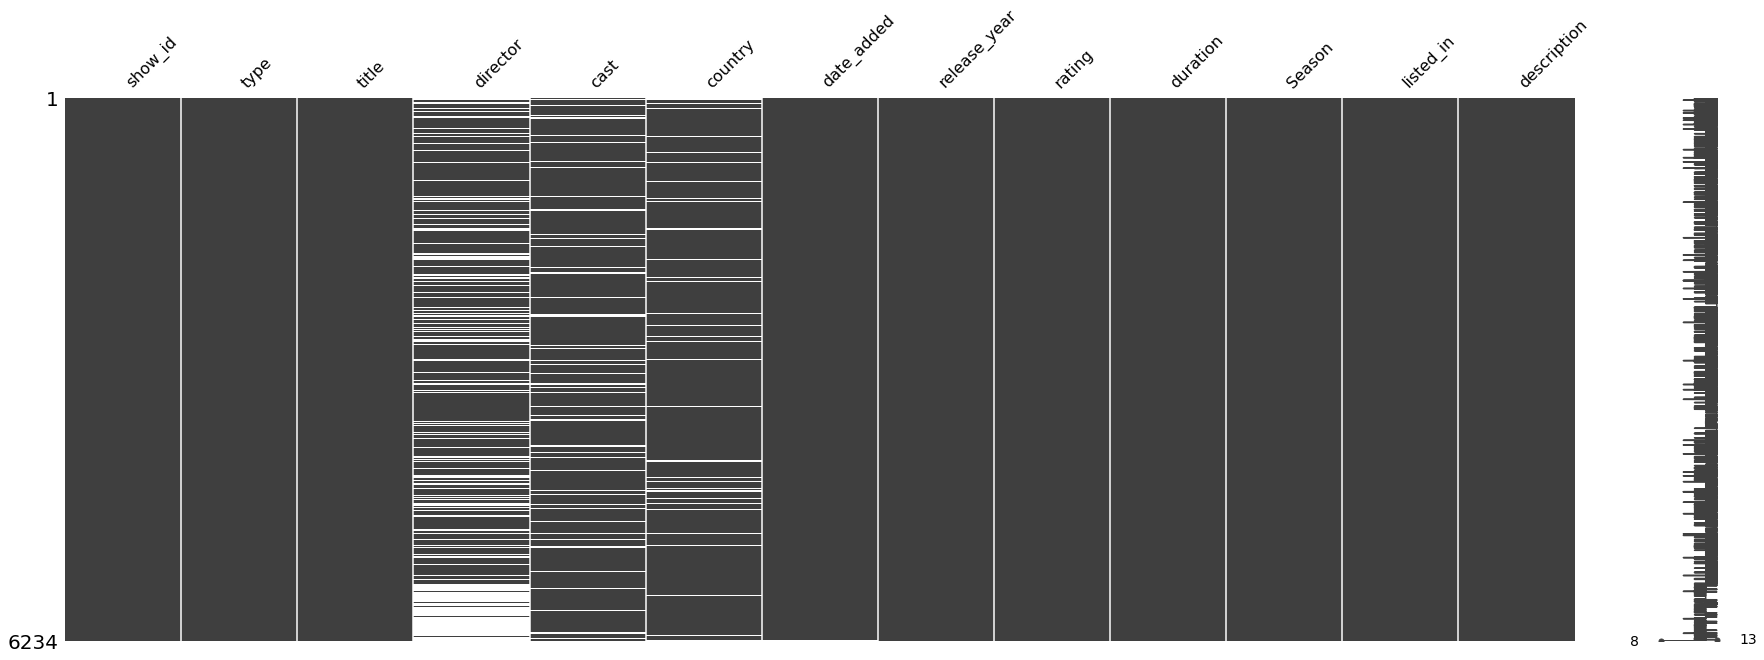

In [7]:
#Principal passo para tratamento de dados é saber onde tem valores Nan
#Esse grafico mostra que esses valores estão concentrados em 3 colunas: director, cast e country
msno.matrix(data, figsize = (30,10))

In [11]:
##Não faz sentindo deletar esses valores Nan, irei mudar para "Unknown" 

data["director"]=data["director"].fillna("Unknown")
data["cast"]=data["cast"].fillna("Unknown")
data["country"]=data["country"].fillna("Unknown")

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,0,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,0,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,0,1,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,0,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,0,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,0,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,Unknown,NaT,2016,NaN,60,0,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,0,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [36]:
#Quantidade de TvShow e Movie na netflix
data['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

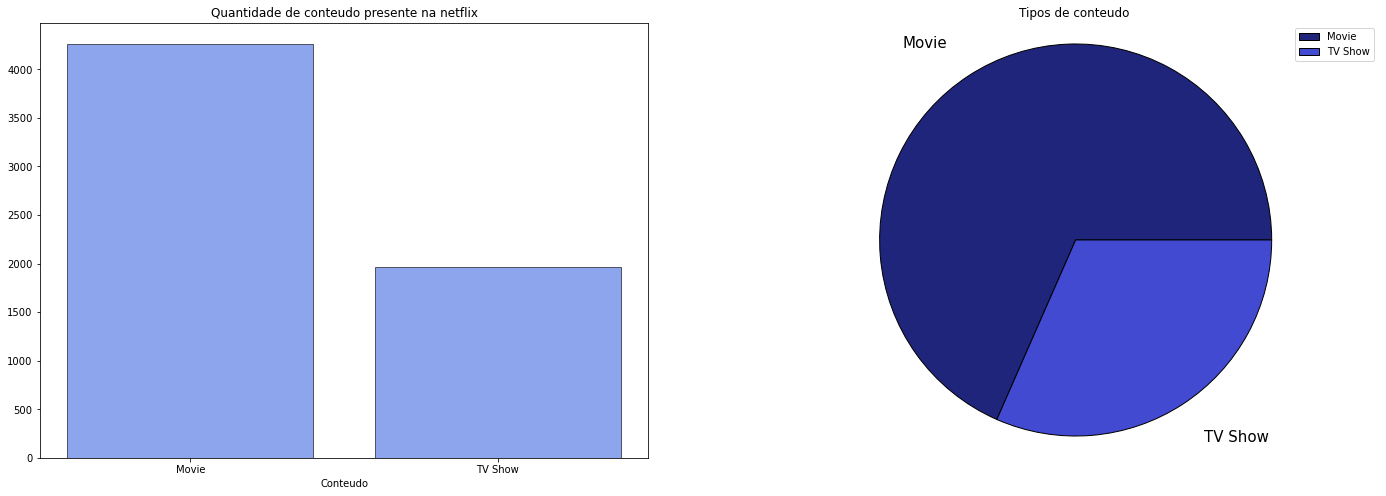

In [27]:
#Analise grafica da quantidade de conteudo da netflix
count = data["type"].value_counts().values
tipos = data["type"].value_counts().index
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)#codigo que habilita colocar mais de um plot na função, parametros significa colocando figura 1 linha e 2 colunas, no plot 1
plt.bar(tipos, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("Conteudo")
plt.title("Quantidade de conteudo presente na netflix")
plt.subplot(1, 2, 2)
plt.pie(count, #plot no formato pizza 
        labels = list(tipos),  
        colors = ["#20257c", "#424ad1"],
        labeldistance = 1.2,        
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")#serve para deixar grafico formato redondo
plt.title("Tipos de conteudo")
plt.legend()

Text(0, 0.5, 'Contagem')

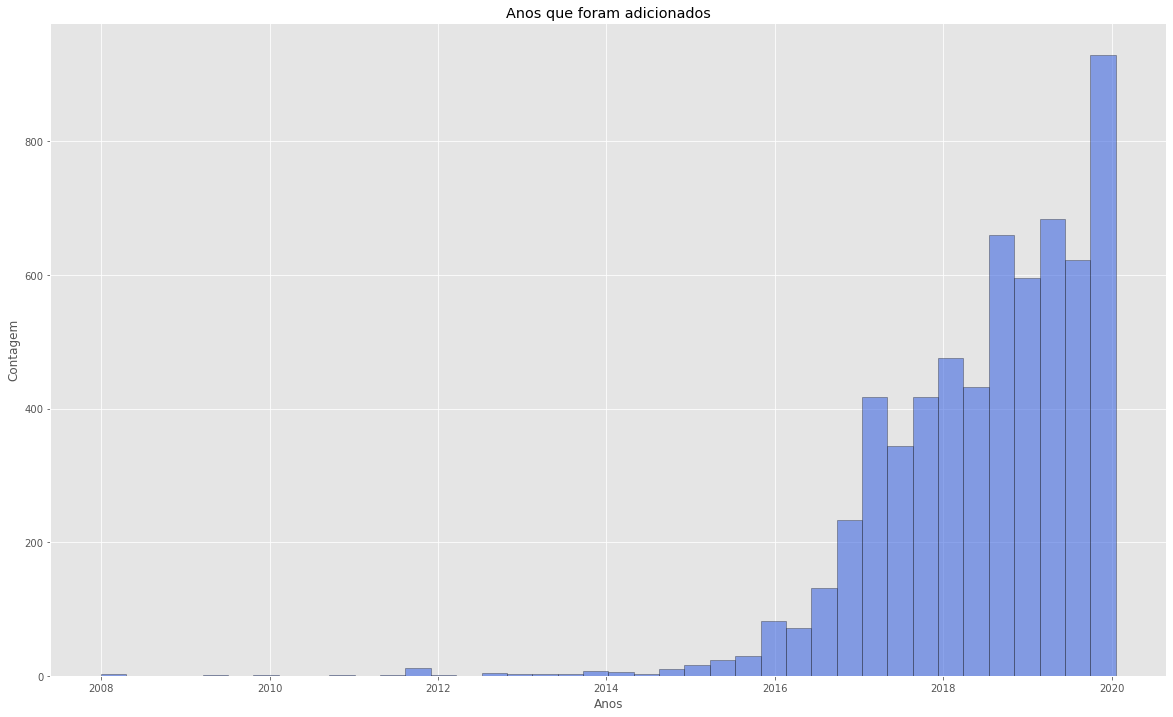

In [28]:
#analise em que ano foi adicionado mais itens na netflix
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
data["date_added"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Anos que foram adicionados")
plt.xlabel("Anos")
plt.ylabel("Contagem")

In [35]:
#Descobrindo os filmes mais antigos
old=data['type']=="Movie"
data[old].sort_values(by="release_year", ascending= True).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
2013,60027942,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-G,18,0,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
2011,60027945,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942,TV-PG,52,0,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2023,70013050,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",Unknown,United States,2017-03-31,1943,TV-14,82,0,Documentaries,This installment of Frank Capra's acclaimed do...
2026,70022548,Movie,WWII: Report from the Aleutians,John Huston,Unknown,United States,2017-03-31,1943,NR,45,0,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
2022,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,Unknown,United States,2017-03-31,1943,TV-PG,61,0,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
2017,80119194,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,Unknown,United States,2017-03-31,1944,TV-PG,40,0,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
2019,80119191,Movie,The Negro Soldier,Stuart Heisler,Unknown,United States,2017-03-31,1944,TV-14,40,0,"Classic Movies, Documentaries",This documentary urged African Americans to en...
2021,80119189,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom",2017-03-31,1944,TV-PG,76,0,"Classic Movies, Documentaries",British and American troops join forces to lib...
2009,80119192,Movie,Nazi Concentration Camps,George Stevens,Unknown,United States,2017-03-31,1945,TV-MA,59,0,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...
2005,80119190,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,2017-03-31,1945,TV-14,63,0,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...
